In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
heart=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/heart.csv')
heart.shape

(303, 14)

In [3]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


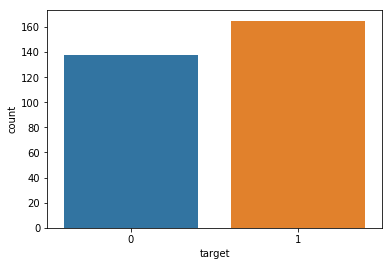

In [4]:
#Countplot
sb.countplot(heart['target'],label='Count')

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


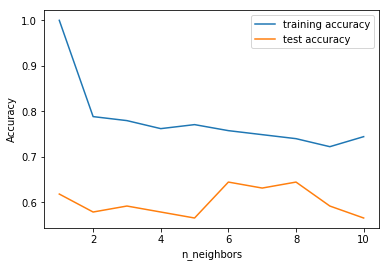

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(heart.loc[:,heart.columns!='target'],heart['target'],stratify=heart['target'],random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
#try n_neighbors from 1 to 10
neighbors_setting=range(1,11)
for n_neighbors in neighbors_setting:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    #record set training accuracy
    training_accuracy.append(knn.score(X_train,y_train))
    #record set training accuracy
    test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors_setting,training_accuracy,label='training accuracy')
plt.plot(neighbors_setting,test_accuracy,label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig('kkn_compare_model')

In [9]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
print('Accuracy of K-NN classifier on training set:',knn.score(X_train,y_train))
print('Accuracy of K-NN classifier on test set:',knn.score(X_test,y_test))

Accuracy of K-NN classifier on training set: 0.7400881057268722
Accuracy of K-NN classifier on test set: 0.6447368421052632
